In [1]:
# 图像分析与理解
# 形态学实验 - 灰度图像
# 东南大学，卓旭，212138

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def readBinaryImage(path, delim=','):
    trimNotEmpty = lambda x: len(x.strip()) > 0
    with open(path, 'r') as fp:
        content = fp.read()
        
    rows = list(filter(trimNotEmpty, content.replace('\r\n', '\n').split('\n')))
    h = len(rows)
    row = list(filter(trimNotEmpty, rows[0].split(delim)))
    w = len(row)
    content = list(map(int, list(filter(trimNotEmpty, content.replace('\n', ',').split(delim)))))
    
    return np.array(content, dtype=bool).reshape(h, w)

def display(img, title=''):
    if img.dtype == bool:
        disp = np.array(img, dtype=np.uint8)
        lut = [0, 255]
        disp[disp == 0] = lut[0]
        disp[disp == 1] = lut[1]
        plt.title(title)
        plt.imshow(disp, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(img, cmap='gray'); plt.title(title)

In [4]:
def complement(img):
    return np.array(255 - img, dtype=np.uint8)

def erode(img, se):
    h, w = img.shape
    sh, sw = se.shape
    assert sh % 2 == 1 and sw % 2 == 1
    res = np.zeros_like(img)
    
    for i in range(h):
        for j in range(w): # enumerate p
            min_ = 255
            for m in range(-sh // 2, sh // 2 + 1):
                for n in range(-sw // 2, sw // 2 + 1):
                    if se[m + sh // 2, n + sw // 2]:
                        r = i + m; c = j + n
                        pix = 255 if (r < 0 or r >= h or c < 0 or c >= w) else img[r, c] # assume we pad using 255
                        min_ = min(pix, min_)
            res[i, j] = min_
    
    return res

def dilate(img, se):
    return complement(erode(complement(img), np.flipud(np.fliplr(se))))

def open_(img, se):
    # (A - B) + B
    return dilate(erode(img, se), se)

def close(img, se):
    # (A + B) - B
    return erode(dilate(img, se), se)

def tophat(img, se):
    return img - open_(img, se)

(256, 256)

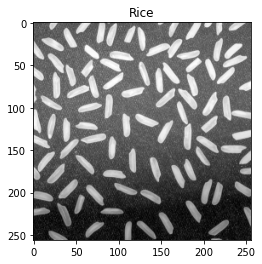

In [5]:
# 1 - 读取rice
Rice = Image.open('./data/rice.png')
Rice = np.array(Rice, dtype=np.uint8)
plt.figure(); display(Rice, 'Rice')
Rice.shape

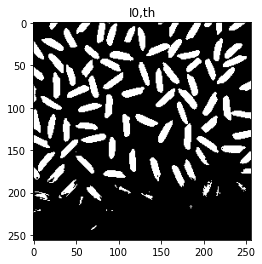

In [6]:
# 2 - 顶帽变换
# a) 直接分割
TH = 150; loc0 = Rice <= TH; loc1 = Rice > TH
I0Th = np.zeros_like(Rice, dtype=bool); I0Th[loc0] = False; I0Th[loc1] = True
plt.figure(); display(I0Th, 'I0,th')

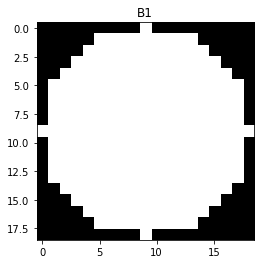

In [7]:
# b)
I0 = Rice
B1 = readBinaryImage('./data/se_1.txt')
display(B1, 'B1')

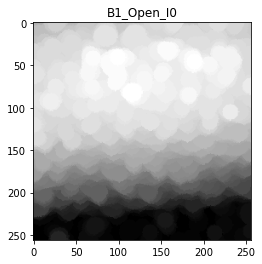

In [8]:
B1_Open_I0 = open_(I0, B1)
plt.figure(); display(B1_Open_I0, 'B1_Open_I0')

min tophatRice:  -9.0


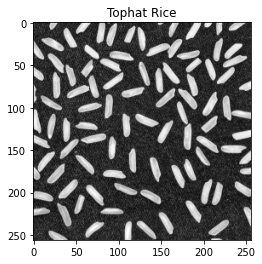

In [10]:
tophatRice = I0.astype(np.float32) - open_(I0, B1)
plt.figure()
display(tophatRice, 'Tophat Rice')
print('min tophatRice: ', np.min(tophatRice))